# Retail Price Optimization Using Machine Learning

### Author: Hafiza Anam Masood 
##### Notebook submission Date:18.10.2023, Author's Contact Info: drhafizaanam@gmail.com

### Retail price optimization is the process of finding the optimal selling price for products or services to maximize revenue and profit while keeping customers happy. It involves using data and pricing strategies to find the right price that maximizes sales and profits. The ultimate aim is to charge a price that helps you make the most money and attracts enough customers to buy your products. To perform retail price optimization, you need data about the prices of products or services and everything that affects the price of a product. Machine learning can be used for retail price optimization. Python libraries and frameworks that will be used for price optimization using machine learning include Scikit-learn and TensorFlow. I downloaded the dataset below to solve this Data Science case study on retail price optimization. 
##### (Data Source: https://www.kaggle.com/datasets/suddharshan/retail-price-optimization)




### To start the task of Retail Price Optimization using Python, you need to import the necessary Python libraries and the dataset

In [51]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.templates.default = "plotly_white"

data = pd.read_csv(r"retail_price.csv", encoding='latin1')
print(data.head())

  product_id product_category_name  month_year  qty  total_price  \
0       bed1        bed_bath_table  01-05-2017    1        45.95   
1       bed1        bed_bath_table  01-06-2017    3       137.85   
2       bed1        bed_bath_table  01-07-2017    6       275.70   
3       bed1        bed_bath_table  01-08-2017    4       183.80   
4       bed1        bed_bath_table  01-09-2017    2        91.90   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0      15.100000       45.95                   39                         161   
1      12.933333       45.95                   39                         161   
2      14.840000       45.95                   39                         161   
3      14.287500       45.95                   39                         161   
4      15.100000       45.95                   39                         161   

   product_photos_qty  ...  comp_1  ps1        fp1      comp_2  ps2  \
0                   2  ...    89.

In [52]:
# Let's find the missing values

print(data.isnull().sum())

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64


In [53]:
# Descriptive Statistics

print(data.describe())

              qty   total_price  freight_price  unit_price  \
count  676.000000    676.000000     676.000000  676.000000   
mean    14.495562   1422.708728      20.682270  106.496800   
std     15.443421   1700.123100      10.081817   76.182972   
min      1.000000     19.900000       0.000000   19.900000   
25%      4.000000    333.700000      14.761912   53.900000   
50%     10.000000    807.890000      17.518472   89.900000   
75%     18.000000   1887.322500      22.713558  129.990000   
max    122.000000  12095.000000      79.760000  364.000000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count           676.000000                  676.000000          676.000000   
mean             48.720414                  767.399408            1.994083   
std               9.420715                  655.205015            1.420473   
min              29.000000                  100.000000            1.000000   
25%              40.000000                  339.000

In [54]:
# Now let’s have a look at the distribution of the prices of the products:

fig = px.histogram(data, x="unit_price", nbins=100, title='Price Distribution')
fig.show()


In [55]:
# see the distribution of the unit prices using a box plot:
fig = px.box(data, 
             y='unit_price', 
             title='Box Plot of Unit Price')
fig.show()

In [56]:
# let’s have a look at the distribution of the total prices of the products:
fig = px.histogram(data, 
                   x='total_price', 
                   nbins=20, 
                   title='Distribution of Total Price')
fig.show()

In [57]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
# Now let’s have a look at the relationship between quantity and total prices:
import statsmodels.api as sm
import plotly.express as px

fig = px.scatter(data, 
                 x='qty', 
                 y='total_price', 
                 title='Relationship between Quantity and Total Price',trendline="ols")
fig.show()




### The relationship between quantity and total prices is linear, indicating that the price structure is based on a fixed unit price, where the total price is calculated by multiplying the quantity by the unit price. This means that the total price increases linearly with the quantity of the product purchased. To optimize retail prices, it is important to understand the relationship between quantity and total prices for different product categories. By analyzing the average total prices by product categories, can identify the optimal prices for each category that maximize revenue and profit while keeping customers happy. 



In [59]:
fig = px.bar(data, x='product_category_name', 
             y='total_price', 
             title='Average Total Price by Product Category')
fig.show()

In [60]:
# Now let’s have a look at the distribution of total prices by weekday using a box plot:
fig = px.box(data, x='weekday', 
             y='total_price', 
             title='Box Plot of Total Price by Weekday')
fig.show()



In [61]:
# Now let’s have a look at the distribution of total prices by holiday using a box plot:
fig = px.box(data, x='holiday', 
             y='total_price', 
             title='Box Plot of Total Price by Holiday')
fig.show()

In [62]:


# Find the column with non-numeric values
non_numeric_cols = []
for col in data.columns:
    if data[col].dtype == 'object':
        non_numeric_cols.append(col)

# Print the non-numeric columns
print("Non-numeric columns:", non_numeric_cols)

# Convert non-numeric values to NaN
for col in non_numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Calculate the correlation matrix
corr_matrix = data.corr()

# Print the correlation matrix
print(corr_matrix)

Non-numeric columns: ['product_id', 'product_category_name', 'month_year']
                            product_id  product_category_name  month_year  \
product_id                         NaN                    NaN         NaN   
product_category_name              NaN                    NaN         NaN   
month_year                         NaN                    NaN         NaN   
qty                                NaN                    NaN         NaN   
total_price                        NaN                    NaN         NaN   
freight_price                      NaN                    NaN         NaN   
unit_price                         NaN                    NaN         NaN   
product_name_lenght                NaN                    NaN         NaN   
product_description_lenght         NaN                    NaN         NaN   
product_photos_qty                 NaN                    NaN         NaN   
product_weight_g                   NaN                    NaN         NaN   
p

In [63]:
%pip install pandas
%pip install seaborn
%pip install matplotlib


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()
fig = go.Figure(go.Heatmap(x=correlation_matrix.columns, 
                           y=correlation_matrix.columns, 
                           z=correlation_matrix.values))
fig.update_layout(title='Correlation Heatmap of Numerical Features')
fig.show()


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


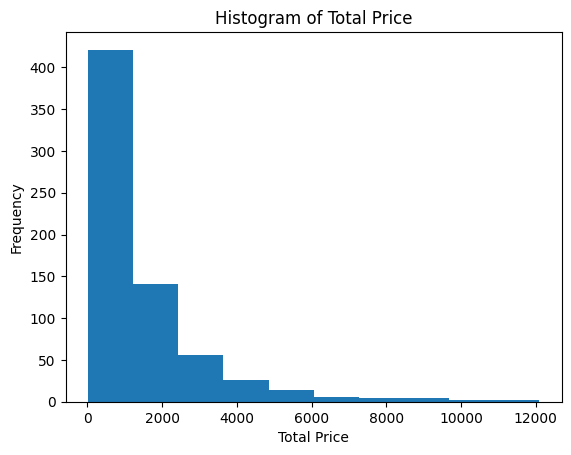

In [65]:

# Plot a histogram of a numerical feature
plt.hist(data['total_price'], bins=10)

# Add labels and a title
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.title('Histogram of Total Price')

# Show the plot
plt.show()

### Analyzing competitors' pricing strategies is crucial in optimizing retail prices,Monitoring and benchmarking against competitors' prices can help identify opportunities to price competitively, either by pricing below or above the competition, depending on the retailer's positioning and strategy.To calculate the average competitor price difference by product category, you need to gather data on your competitors' prices and compare them to your own prices.


In [79]:
pip install scikit-learn

                                              0.0/9.2 MB ? eta -:--:--
                                              0.0/9.2 MB 1.3 MB/s eta 0:00:08
                                              0.1/9.2 MB 656.4 kB/s eta 0:00:14
                                              0.1/9.2 MB 558.5 kB/s eta 0:00:17
                                              0.1/9.2 MB 558.5 kB/s eta 0:00:17
                                              0.1/9.2 MB 558.5 kB/s eta 0:00:17
                                              0.2/9.2 MB 731.4 kB/s eta 0:00:13
                                              0.2/9.2 MB 731.4 kB/s eta 0:00:13
     -                                        0.2/9.2 MB 654.9 kB/s eta 0:00:14
     -                                        0.3/9.2 MB 654.7 kB/s eta 0:00:14
     -                                        0.3/9.2 MB 678.0 kB/s eta 0:00:14
     -                                        0.3/9.2 MB 675.6 kB/s eta 0:00:14
     -                                        0.4/9


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
data['comp_price_diff'] = data['unit_price'] - data['comp_1'] 

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = data[['qty', 'unit_price', 'comp_1', 
          'product_score', 'comp_price_diff']]
y = data['total_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

# Train a linear regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.9547322839734437

The output `0.9547322839734437` is the R-squared score of the trained `DecisionTreeRegressor` model on the test set. The R-squared score is a statistical measure that represents the proportion of the variance in the dependent variable (`y_test`) that is predictable from the independent variables (`X_test`) in the model. 

The R-squared score ranges from 0 to 1, where a score of 1 indicates that the model perfectly predicts the dependent variable and a score of 0 indicates that the model does not explain any of the variance in the dependent variable. In this case, the R-squared score of 0.9547 indicates that the model explains 95.47% of the variance in the test set, which is a good performance.

In [83]:
# Now let’s make predictions and have a look at the predicted retail prices and the actual retail prices:


# Make predictions on the test set
y_pred = model.predict(X_test)

fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers', 
                         marker=dict(color='blue'), 
                         name='Predicted vs. Actual Retail Price'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], 
                         mode='lines', 
                         marker=dict(color='red'), 
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted vs. Actual Retail Price',
    xaxis_title='Actual Retail Price',
    yaxis_title='Predicted Retail Price'
)
fig.show()



### In summary, optimizing retail prices with machine learning using Python involves analyzing competitors' pricing strategies, gathering data on prices, and using pricing strategies to find the right price that maximizes sales and profits while keeping customers happy. By using Python libraries and machine learning algorithms, this is how you can automate the process of pricing optimization and maximize revenue and profit.